In [1]:
import ppi_pipeline as ppi

/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torc

## Create list of terms

In [2]:
# C elegans proteome was already pulled

# Make list of terms
terms = ppi.list_synonyms("../omes", "UP000001940_proteome.txt")
terms = list(set(terms))

In [4]:
import pandas as pd

sw = pd.read_csv("../omes/stop_words_english.txt")["stopwords"].tolist()
terms = [term for term in terms if term not in sw]

## Find terms in papers

In [3]:
paper_directory = "/Users/degn400/Git_Repos/nlp_benchmark/data/benchmark2/data/final_cohort/papers"
output_directory = "/Users/degn400/Downloads/Celegans_Test"

ppi.find_terms_in_papers(
    paper_directory = paper_directory,
    terms = terms,
    n_gram_max = 5,
    padding = 50,
    output_directory = output_directory,
    verbose = True
)

On file10839354.txt
On file15649460.txt
On file15621535.txt
On file21504747.txt
On file24462208.txt
On file22561316.txt
On file10996789.txt
On file7907274.txt
On file28696027.txt
On file22634595.txt
On file11702948.txt
On file10764728.txt
On file15333932.txt
On file12754521.txt
On file10983970.txt
On file26412237.txt
On file3419531.txt
On file14534135.txt
On file7202124.txt
On file9553113.txt
On file9165118.txt
On file16701565.txt
On file1623520.txt
On file21130760.txt
On file8548815.txt
On file15935776.txt
On file9150941.txt
On file17854888.txt
On file11684669.txt
On file20977550.txt
On file20385102.txt
On file15268855.txt
On file16162648.txt
On file26506309.txt
On file18508862.txt
On file9393998.txt
On file19646877.txt
On file8242740.txt
On file8751440.txt
On file9458050.txt
On file10688797.txt
On file21558371.txt
On file15318222.txt
On file11341844.txt
On file15063172.txt
On file2160853.txt
On file9878245.txt
On file26904949.txt
On file17276341.txt
On file17942636.txt
On file1608450

## Run BioBERT

In [7]:
import os 
ppi.run_bert(input_path = os.path.join(output_directory, "cleaned_pairs.csv"),
             model_path = "../biobert", # Update to the path of your BERT model if necessary. We recommend placing biobert in the top directory.
             output_directory = output_directory,
             segment_col_name = "segment",
             use_cpu = True)

/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/modeling_utils.py:519: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(checkpoint_

## Map Synonyms

In [7]:
import pandas as pd
import os

output_directory = "/Users/degn400/Downloads/Celegans_Test"

# Pull all identified relationships and filter to the confirmed ones
BERT = pd.read_table(os.path.join(output_directory, "bert_results.txt"))
TrueBERT = BERT[BERT["True Positive"] >= 0.5]
TrueBERT

,paper_id,term_1,term_2,id,sentence_index,segment_length,Term1,Term2,Sentence,True Negative,True Positive
67,10022905,mog1,fem3,10022905,391,169,@TERM$1,@TERM$2,we favor the idea that @TERM$1 is part of a ...,0.000538,0.999462
191,10359617,t01g92,lin10,10359617,148,139,@TERM$1,@TERM$2,it islikely that the weak rescue provided by g...,0.001169,0.998831
252,10364160,insulin,daf16,10364160,819,123,@TERM$1,@TERM$2,caenorhabditis elegans aktpkb transduces @TER...,0.053035,0.946965
322,10364160,akt1,age1,10364160,175,135,@TERM$1,@TERM$2,these results are consistent with the model th...,0.138733,0.861267
342,10364161,fem2,phosphatase,10364161,378,136,@TERM$1,@TERM$2,caenorhabditis eleganssexdetermining protein ...,0.001271,0.998729
...,...,...,...,...,...,...,...,...,...,...,...
58196,9531567,hmp1,hmp2,9531567,112,126,@TERM$1,@TERM$2,the 13 hmp mutants identify the genes @TERM$1...,0.195353,0.804647
58197,9531567,hmp1,hmr1,9531567,112,126,@TERM$1,@TERM$2,the 13 hmp mutants identify the genes @TERM$1...,0.000014,0.999986
58201,9531567,hmp2,hmr1,9531567,51,145,@TERM$1,@TERM$2,we show that the genes hmp1 @TERM$1 and @TE...,0.000460,0.999540
58292,9609829,mes2,mes6,9609829,2,121,@TERM$1,@TERM$2,in caenorhabditis elegans germline immortality...,0.011457,0.988543


In [8]:
all_found_terms = TrueBERT["term_1"].tolist()
all_found_terms.extend(TrueBERT["term_2"].to_list())
all_found_terms = list(set(all_found_terms))

In [1]:
import ppi_pipeline as ppi

ppi.map_synonyms(
    term_list = all_found_terms,
    omes_folder = "../omes",
    proteome_filename = "UP000001940_proteome.txt",
    add_missing = True,
    output_directory = output_directory
)

/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torc

NameError: name 'all_found_terms' is not defined

In [5]:
import os
synonyms = pd.read_csv(os.path.join(output_directory, "synonym_table.txt"), sep = "\t")
synonyms

,Synonym,ID,Type
0,110phenanthroline,CHEBI:44975,metabolite
1,12c,CHEBI:36931,metabolite
2,1epimerase,G5ECR6,gene product
3,22dipyridyl,CHEBI:30351,metabolite
4,2ab,CHEBI:74526,metabolite
...,...,...,...
1100,zvadfmk,CHEBI:137045,metabolite
1101,zyg1,Q9GT24,gene product
1102,zyg11,P21541,gene product
1103,zyx1,A0A9J5HVW4,gene product


## Visualize Network

In [9]:
network_table = ppi.build_network_table(TrueBERT, synonyms)
network_table

,Synonym1,ID1,Type1,Synonym2,ID2,Type2,Source
0,mog1,P34498,gene product,fem3,P34691,gene product,literature
1,t01g92,P34692,gene product,lin10,O17583,gene product,literature
2,insulin,CHEBI:5931,metabolite,daf16,A0A0K3ASK2,gene product,literature
3,akt1,Q17941,gene product,age1,Q94125,gene product,literature
4,fem2,P49594,gene product,phosphatase,H2KZM6,gene product,literature
...,...,...,...,...,...,...,...
2242,hmp1,P90947,gene product,hmp2,O44326,gene product,literature
2243,hmp1,P90947,gene product,hmr1,Q967F4,gene product,literature
2244,hmp2,O44326,gene product,hmr1,Q967F4,gene product,literature
2245,mes2,O17514,gene product,mes6,Q9GYS1,gene product,literature


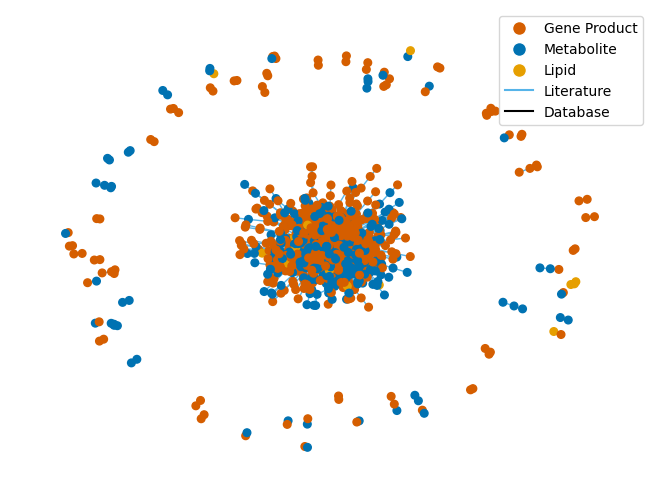

In [10]:
ppi.visualize_network(network_table, edge_weight = 1)

## Pull Database Information

In [11]:
import ppi_pipeline as ppi

output_directory = "/Users/degn400/Downloads/Celegans_Test"

ppi.pull_uniprot(6239, output_directory, verbose = True)

...pulling organism metadata


KeyboardInterrupt: 

In [ ]:
import ppi_pipeline as ppi

output_directory = "/Users/degn400/Downloads/Celegans_Test"

ppi.pull_wikipathways(species_name = "Caenorhabditis elegans", 
                      species_id = "6239", 
                      omes_folder = "../omes", 
                      proteome_filename = "UP000001940_proteome.txt", 
                      output_directory= output_directory, 
                      verbose = True)

/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torc

Extracting entities for: WP110
...Mapping terms to standardized IDs
WP110 not found
Extracting entities for: WP123
...Mapping terms to standardized IDs


In [1]:
import ppi_pipeline as ppi

output_directory = "/Users/degn400/Downloads/Celegans_Test"

ppi.pull_kegg(
    kegg_species_id = "cel",
    omes_folder = "../omes",
    proteome_filename = "UP000001940_proteome.txt", 
    output_directory = output_directory,
    verbose = True
)

/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torc

...extracting organism information
...pulling pathways. ETA: 222.0 seconds
...pulling modules. ETA: 276 seconds
M00621 module not found
M00142 module not found
M00073 module not found
M00087 module not found
M00160 module not found
M00009 module not found
M00555 module not found
M00120 module not found
M00083 module not found
M00059 module not found
M00148 module not found
M00549 module not found
M00143 module not found
M00053 module not found
M00151 module not found
M00072 module not found
M00085 module not found
M00415 module not found
M00307 module not found


## Database Network

In [17]:
import ppi_pipeline as ppi
import pandas as pd

all_rels = pd.concat([
    pd.read_csv("~/Downloads/Celegans_Test/6239_uniprot.txt", sep = "\t"),
    pd.read_csv("~/Downloads/Celegans_Test/6239_wikipathways.txt", sep = "\t"),
    pd.read_csv("~/Downloads/Celegans_Test/cel_kegg_flattened.txt", sep = "\t"),
    pd.read_csv("../omes/LipidMaps_Relationships.txt", sep = "\t"),

])

In [18]:
my_ids = network_table["ID1"].tolist()
my_ids.extend(network_table["ID2"].tolist())
my_ids = list(set(my_ids))

the_subset = all_rels[(all_rels["ID1"].isin(my_ids)) & (all_rels["ID2"].isin(my_ids))]
the_subset

,Synonym1,ID1,Type1,Synonym2,ID2,Type2,Source
1,Not needed,B1Q236,gene product,Not needed,Q9U3P2,gene product,database
12,Not needed,G5EBV6,gene product,Not needed,G5EC37,gene product,database
57,Not needed,G5EC36,gene product,Not needed,P20271,gene product,database
58,Not needed,G5EC37,gene product,Not needed,Q09490,gene product,database
69,Not needed,G5ECG2,gene product,Not needed,G5ECU7,gene product,database
...,...,...,...,...,...,...,...
20,pc,CHEBI:16110,metabolite,ps,CHEBI:18303,metabolite,database
63,pip3,CHEBI:16618,metabolite,pi,CHEBI:53806,metabolite,database
64,pi,CHEBI:53806,metabolite,pip3,CHEBI:16618,metabolite,database
269,lps,CHEBI:52603,metabolite,ps,CHEBI:18303,metabolite,database


In [19]:
toplot2 = pd.concat([
    the_subset,
    network_table
]).reset_index(drop = True)

In [20]:
toplot2.to_csv("~/Downloads/Celegans_Test/final_table.csv", index = False)

/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/Users/degn400/.virtualenvs/spacy/lib/python3.9/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torc

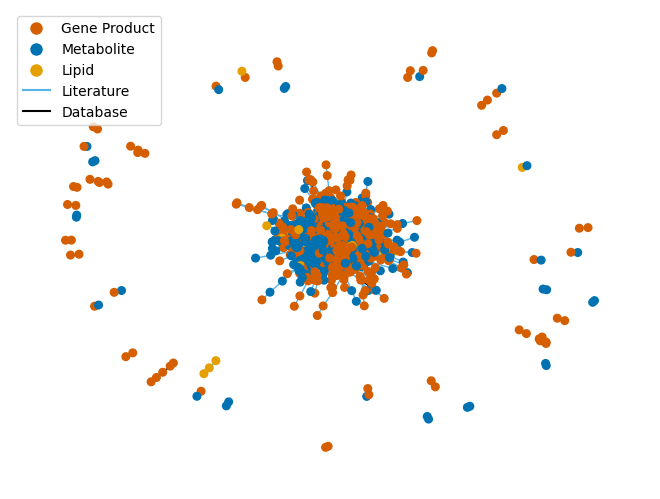

In [1]:
import ppi_pipeline as ppi
import pandas as pd

toplot2 = pd.read_csv("~/Downloads/Celegans_Test/final_table.csv")
network = ppi.visualize_network(toplot2, edge_weight = 1)
network

In [2]:
ppi.calculate_network_metrics(network)

{'Number of Components': 44,
 'Average Component Size': 23.7273,
 'Degree Centrality':              Node  Centrality
 0     CHEBI:15422    0.082454
 1     CHEBI:15996    0.082454
 2      A0A0K3ASK2    0.076702
 3     CHEBI:17895    0.074784
 4     CHEBI:17754    0.074784
 ...           ...         ...
 1039       Q11190    0.000959
 1040       Q9XX14    0.000959
 1041  CHEBI:40910    0.000959
 1042       P17657    0.000959
 1043       O02365    0.000959
 
 [1044 rows x 2 columns],
 'Clustering Coefficient': 0.2034}